# Data Exploration

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
5                                     Moran, Mr. James    male  NaN      0   
6                              McCarthy, Mr. Timothy J    male   54      0   
7                       Palsson, Master. Gosta Leonard    male    2      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   
10                     Sandstrom, Miss. Marguerite Rut  female    4      1   
11                            Bonnell, Miss. Elizabeth  female   58      0   
12                      Saundercock, Mr. William Henry    male   20      0   
13                         Andersson, Mr. Anders Johan    male   39      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female   14      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female   55      0   
16                                Rice, Master. Eugene    male    2      4   
17                        Williams, Mr. Charles Eugene    male  NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female   31      1   
19                             Masselmani, Mrs. Fatima  female  NaN      0   
20        

Data Visualization

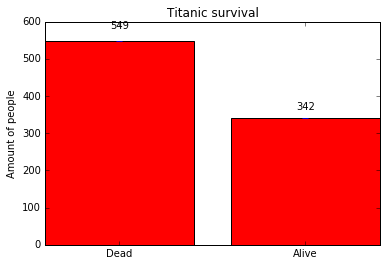

In [84]:
# Survived vs Not Survived
s1 = len(data[data['Survived']==1])
s0 = len(data) - s1

N = 2
men_means = (s0,s1)
men_std = (0,0)

ind = np.arange(N)  # the x locations for the groups
width = 0.8   # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Amount of people')
ax.set_title('Titanic survival')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Dead','Alive'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

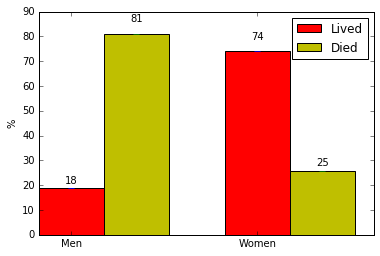

In [85]:
ms = float(len(data[(data['Survived']==1) & (data['Sex']=="male")]))/ \
float(len(data[data['Sex']=="male"]))*100
mns = float(len(data[(data['Survived']==0) & (data['Sex']=="male")]))/ \
float(len(data[data['Sex']=="male"]))*100
fs = float(len(data[(data['Survived']==1) & (data['Sex']=="female")]))/ \
float(len(data[data['Sex']=="female"]))*100
fns = float(len(data[(data['Survived']==0) & (data['Sex']=="female")]))/ \
float(len(data[data['Sex']=="female"]))*100


N = 2
sur_means = (ms,fs)
sur_std = (0,0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, sur_means, width, color='r', yerr=sur_std)

nsur_means = (mns,fns)
nsur_std = (0,0)
rects2 = ax.bar(ind + width, nsur_means, width, color='y', yerr=nsur_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('%')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Men', 'Women'))

ax.legend((rects1[0], rects2[0]), ('Lived', 'Died'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

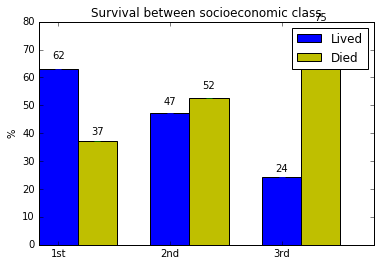

In [86]:
#Amount of males vs females survived
ss1 = float(len(data[(data['Survived']==1) & (data['Pclass']==1)]))/ \
float(len(data[data['Pclass']==1]))*100
sns1 = float(len(data[(data['Survived']==0) & (data['Pclass']==1)]))/ \
float(len(data[data['Pclass']==1]))*100
ss2 = float(len(data[(data['Survived']==1) & (data['Pclass']==2)]))/ \
float(len(data[data['Pclass']==2]))*100
sns2 = float(len(data[(data['Survived']==0) & (data['Pclass']==2)]))/ \
float(len(data[data['Pclass']==2]))*100
ss3 = float(len(data[(data['Survived']==1) & (data['Pclass']==3)]))/ \
float(len(data[data['Pclass']==3]))*100
sns3 = float(len(data[(data['Survived']==0) & (data['Pclass']==3)]))/ \
float(len(data[data['Pclass']==3]))*100



N = 3
ss_means = (ss1,ss2,ss3)
ss_std = (0,0,0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35   # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ss_means, width, color='b', yerr=ss_std)

sns_means = (sns1,sns2,sns3)
sns_std = (0,0,0)
rects2 = ax.bar(ind + width, sns_means, width, color='y', yerr=sns_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('%')
ax.set_title('Survival between socioeconomic class')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1st','2nd','3rd'))

ax.legend((rects1[0], rects2[0]), ('Lived', 'Died'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

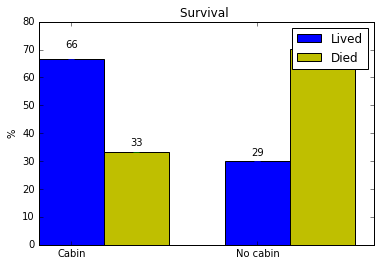

In [87]:
snocab = float(len(data[(data['Survived']==1) & (data['Cabin'].isnull())]))/ \
float(len(data[data['Cabin'].isnull()]))*100
scab = float(len(data[(data['Survived']==1) & ~(data['Cabin'].isnull())]))/ \
float(len(data[~data['Cabin'].isnull()]))*100
nsnocab = float(len(data[(data['Survived']==0) & (data['Cabin'].isnull())]))/ \
float(len(data[data['Cabin'].isnull()]))*100
nscab = float(len(data[(data['Survived']==0) & ~(data['Cabin'].isnull())]))/ \
float(len(data[~data['Cabin'].isnull()]))*100

N = 2
ss_means = (scab,snocab)
ss_std = (0,0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35   # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ss_means, width, color='b', yerr=ss_std)

sns_means = (nscab,nsnocab)
sns_std = (0,0)
rects2 = ax.bar(ind + width, sns_means, width, color='y', yerr=sns_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('%')
ax.set_title('Survival ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Cabin','No cabin'))

ax.legend((rects1[0], rects2[0]), ('Lived', 'Died'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Data Preprocessing

In [88]:
'''from sklearn.preprocessing import MinMaxScaler

# Split the data into features and target label
survived_raw = data['Survived']
features_raw = data.drop('Survived', axis = 1)


# Log-transform the skewed features
skewed = ['Age']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

#Scaling numeric features using MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Age', 'Fare', 'Pclass']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

#One-hot encoding categorical data
embarked_feature = pd.get_dummies(features_raw['Embarked'])
sex_feature = pd.get_dummies(features_raw['Sex'])
features = pd.concat([features_raw,embarked_feature,sex_feature],axis=1)
features = features.drop(['Embarked','Sex',0,'Ticket','Name'],axis=1)
features['Cabin'] = [0 if val==0 else 1 for index,val in features['Cabin'].iteritems()]
features=features.drop(['PassengerId','Parch','SibSp'],axis=1)
features'''

"from sklearn.preprocessing import MinMaxScaler\n\n# Split the data into features and target label\nsurvived_raw = data['Survived']\nfeatures_raw = data.drop('Survived', axis = 1)\n\n\n# Log-transform the skewed features\nskewed = ['Age']\nfeatures_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))\n\n#Scaling numeric features using MinMaxScaler\nscaler = MinMaxScaler()\nnumerical = ['Age', 'Fare', 'Pclass']\nfeatures_raw[numerical] = scaler.fit_transform(features_raw[numerical])\n\n#One-hot encoding categorical data\nembarked_feature = pd.get_dummies(features_raw['Embarked'])\nsex_feature = pd.get_dummies(features_raw['Sex'])\nfeatures = pd.concat([features_raw,embarked_feature,sex_feature],axis=1)\nfeatures = features.drop(['Embarked','Sex',0,'Ticket','Name'],axis=1)\nfeatures['Cabin'] = [0 if val==0 else 1 for index,val in features['Cabin'].iteritems()]\nfeatures=features.drop(['PassengerId','Parch','SibSp'],axis=1)\nfeatures"

In [89]:
snocab = float(len(data[(data['Survived']==1) & (data['Cabin'].isnull())]))/ \
float(len(data[data['Cabin'].isnull()]))
scab = float(len(data[(data['Survived']==1) & ~(data['Cabin'].isnull())]))/ \
float(len(data[~data['Cabin'].isnull()]))
nsnocab = float(len(data[(data['Survived']==0) & (data['Cabin'].isnull())]))/ \
float(len(data[data['Cabin'].isnull()]))
nscab = float(len(data[(data['Survived']==0) & ~(data['Cabin'].isnull())]))/ \
float(len(data[~data['Cabin'].isnull()]))

data1=pd.DataFrame()
data2=pd.DataFrame()

data1 = data[data['Cabin'].isnull()]
data1['Cabin'] = snocab
data2 = data[~data['Cabin'].isnull()]
data2['Cabin'] = scab
data = pd.concat([data1,data2],ignore_index=True)
data = data.sort(['PassengerId'],ascending=True)

#snocab,scab,nsnocab,nscab
data

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


PassengerId  Survived  Pclass  \
0              1         0       3   
687            2         1       1   
1              3         1       3   
688            4         1       1   
2              5         0       3   
3              6         0       3   
689            7         0       1   
4              8         0       3   
5              9         1       3   
6             10         1       2   
690           11         1       3   
691           12         1       1   
7             13         0       3   
8             14         0       3   
9             15         0       3   
10            16         1       2   
11            17         0       3   
12            18         1       2   
13            19         0       3   
14            20         1       3   
15            21         0       2   
692           22         1       2   
16            23         1       3   
693           24         1       1   
17            25         0       3   
18            26         1       3   
19            27         0       3   
694           28         0       1   
20            29         1       3   
21            30         0       3   
..           ...       ...     ...   
664          862         0       2   
884          863         1       1   
665          864         0       3   
666          865         0       2   
667          866         1       2   
668          867         1       2   
885          868         0       1   
669          869         0       3   
670          870         1       3   
671          871         0       3   
886          872         1       1   
887          873         0       1   
672          874         0       3   
673          875         1       2   
674          876         1       3   
675          877         0       3   
676          878         0       3   
677          879         0       3   
888          880         1       1   
678          881         1       2   
679          882         0       3   
680          883         0       3   
681          884         0       2   
682          885         0       3   
683          886         0       3   
684          887         0       2   
889          888         1       1   
685          889         0       3   
890          890         1       1   
686          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
687  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
1                               Heikkinen, Miss. Laina  female   26      0   
688       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
2                             Allen, Mr. William Henry    male   35      0   
3                                     Moran, Mr. James    male  NaN      0   
689                            McCarthy, Mr. Timothy J    male   54      0   
4                       Palsson, Master. Gosta Leonard    male    2      3   
5    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
6                  Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   
690                    Sandstrom, Miss. Marguerite Rut  female    4      1   
691                           Bonnell, Miss. Elizabeth  female   58      0   
7                       Saundercock, Mr. William Henry    male   20      0   
8                          Andersson, Mr. Anders Johan    male   39      1   
9                 Vestrom, Miss. Hulda Amanda Adolfina  female   14      0   
10                    Hewlett, Mrs. (Mary D Kingcome)   female   55      0   
11                                Rice, Master. Eugene    male    2      4   
12                        Williams, Mr. Charles Eugene    male  NaN      0   
13   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female   31      1   
14                             Masselmani, Mrs. Fatima  female  NaN      0   
15        

In [90]:
s1 = float(len(data[(data['Survived']==1) & (data['Pclass']==1)]))/ \
float(len(data[data['Pclass']==1]))
s2 = float(len(data[(data['Survived']==1) & (data['Pclass']==2)]))/ \
float(len(data[data['Pclass']==2]))
s3 = float(len(data[(data['Survived']==1) & (data['Pclass']==3)]))/ \
float(len(data[data['Pclass']==3]))

data=data.replace({'Pclass' : {1:s1,2:s2,3:s3}})

s1,s2,s3

(0.6296296296296297, 0.47282608695652173, 0.24236252545824846)

In [91]:
m = float(len(data[(data['Survived']==1) & (data['Sex']=="male")]))/ \
float(len(data[data['Sex']=="male"]))
f = float(len(data[(data['Survived']==1) & (data['Sex']=="female")]))/ \
float(len(data[data['Sex']=="female"]))

data=data.replace({'Sex' : {"male":m,"female":f}})

m,f

(0.18890814558058924, 0.7420382165605095)

In [92]:
sib0 = float(len(data[(data['Survived']==1) & (data['SibSp']==0)]))/ \
float(len(data[data['SibSp']==0]))
sib1 = float(len(data[(data['Survived']==1) & (data['SibSp']==1)]))/ \
float(len(data[data['SibSp']==1]))
sib2 = float(len(data[(data['Survived']==1) & (data['SibSp']==2)]))/ \
float(len(data[data['SibSp']==2]))
sib3 = float(len(data[(data['Survived']==1) & (data['SibSp']==3)]))/ \
float(len(data[data['SibSp']==3]))
sib4 = float(len(data[(data['Survived']==1) & (data['SibSp']==4)]))/ \
float(len(data[data['SibSp']==4]))
sib5 = float(len(data[(data['Survived']==1) & (data['SibSp']==5)]))/ \
float(len(data[data['SibSp']==5]))
sib8 = float(len(data[(data['Survived']==1) & (data['SibSp']==8)]))/ \
float(len(data[data['SibSp']==8]))

#data['SibSp'] = data.col.map({0:sib0,1:sib1,2:sib2,3:sib3,4:sib4}).fillna(0).astype(int)
data=data.replace({'SibSp' : {0:sib0,1:sib1,2:sib2,3:sib3,4:sib4}})
data=data.replace({'SibSp':{5:0,6:0,7:0,8:0}})

sib0,sib1,sib2,sib3,sib4,sib5,sib8

(0.34539473684210525,
 0.5358851674641149,
 0.4642857142857143,
 0.25,
 0.16666666666666666,
 0.0,
 0.0)

In [93]:
portS = float(len(data[(data['Survived']==1) & (data['Embarked']=='S')]))/ \
float(len(data[data['Embarked']=='S']))
portC = float(len(data[(data['Survived']==1) & (data['Embarked']=='C')]))/ \
float(len(data[data['Embarked']=='C']))
portQ = float(len(data[(data['Survived']==1) & (data['Embarked']=='Q')]))/ \
float(len(data[data['Embarked']=='Q']))

data=data.replace({'Embarked' : {"S":portS,"C":portC,"Q":portQ}})

portS,portC,portQ

(0.33695652173913043, 0.5535714285714286, 0.38961038961038963)

In [94]:
bin_diff=(data['Fare'].max()-data['Fare'].min())/10
bins = np.arange(0,data['Fare'].max()+1,bin_diff)
data['categories'] = pd.cut(data['Fare'], bins,labels=[1,2,3,4,5,6,7,8,9,10])
data['categories']=data['categories'].fillna(1)
counts = pd.value_counts(data['categories'])
stemp = data[data['Survived']==1]
scounts = pd.value_counts(stemp['categories'])
prob=(scounts/counts).dropna()
prob=prob.drop(prob.index[6])

#ax=plt.scatter(prob.index, prob)
#line =plt.plot(np.unique(prob.index), np.poly1d(np.polyfit(prob.index, prob, 1))(np.unique(prob.index)))
slope,intercept=np.polyfit(prob.index, prob, 1)

data['categories'] = map(lambda x: x * slope + intercept, data['categories'])
data['Fare'] = data['categories']
del data['categories']


In [95]:

age_bins = [0,18,60,80]
data['categories2'] = pd.cut(data['Age'], age_bins,labels=['Child','Adult','Senior'])
counts = pd.value_counts(data['categories2'])
stemp = data[data['Survived']==1]
scounts = pd.value_counts(stemp['categories2'])
prob=(scounts/counts).dropna()

child=prob[prob.index=='Child'].values[0]
adult=prob[prob.index=='Adult'].values[0]
senior=prob[prob.index=='Senior'].values[0]

data['Age']=data['categories2']
data['Age']=data['Age'].cat.codes
data=data.replace({'Age':{1:child,0:adult,2:senior}})
data=data.replace({'Age':{-1:0}})
data

PassengerId  Survived    Pclass  \
0              1         0  0.242363   
687            2         1  0.629630   
1              3         1  0.242363   
688            4         1  0.629630   
2              5         0  0.242363   
3              6         0  0.242363   
689            7         0  0.629630   
4              8         0  0.242363   
5              9         1  0.242363   
6             10         1  0.472826   
690           11         1  0.242363   
691           12         1  0.629630   
7             13         0  0.242363   
8             14         0  0.242363   
9             15         0  0.242363   
10            16         1  0.472826   
11            17         0  0.242363   
12            18         1  0.472826   
13            19         0  0.242363   
14            20         1  0.242363   
15            21         0  0.472826   
692           22         1  0.472826   
16            23         1  0.242363   
693           24         1  0.629630   
17            25         0  0.242363   
18            26         1  0.242363   
19            27         0  0.242363   
694           28         0  0.629630   
20            29         1  0.242363   
21            30         0  0.242363   
..           ...       ...       ...   
664          862         0  0.472826   
884          863         1  0.629630   
665          864         0  0.242363   
666          865         0  0.472826   
667          866         1  0.472826   
668          867         1  0.472826   
885          868         0  0.629630   
669          869         0  0.242363   
670          870         1  0.242363   
671          871         0  0.242363   
886          872         1  0.629630   
887          873         0  0.629630   
672          874         0  0.242363   
673          875         1  0.472826   
674          876         1  0.242363   
675          877         0  0.242363   
676          878         0  0.242363   
677          879         0  0.242363   
888          880         1  0.629630   
678          881         1  0.472826   
679          882         0  0.242363   
680          883         0  0.242363   
681          884         0  0.472826   
682          885         0  0.242363   
683          886         0  0.242363   
684          887         0  0.472826   
889          888         1  0.629630   
685          889         0  0.242363   
890          890         1  0.629630   
686          891         0  0.242363   

                                                  Name       Sex       Age  \
0                              Braund, Mr. Owen Harris  0.188908  0.503597   
687  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.742038  0.503597   
1                               Heikkinen, Miss. Laina  0.742038  0.503597   
688       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.742038  0.503597   
2                             Allen, Mr. William Henry  0.188908  0.503597   
3                                     Moran, Mr. James  0.188908  0.000000   
689                            McCarthy, Mr. Timothy J  0.188908  0.503597   
4                       Palsson, Master. Gosta Leonard  0.188908  0.388788   
5    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  0.742038  0.503597   
6                  Nasser, Mrs. Nicholas (Adele Achem)  0.742038  0.388788   
690                    Sandstrom, Miss. Marguerite Rut  0.742038  0.388788   
691                           Bonnell, Miss. Elizabeth  0.742038  0.503597   
7                       Saundercock, Mr. William Henry  0.188908  0.503597   
8                          Andersson, Mr. Anders Johan  0.188908  0.503597   
9                 Vestrom, Miss. Hulda Amanda Adolfina  0.742038  0.388788   
10                    Hewlett, Mrs. (Mary D Kingcome)   0.742038  0.503597   
11                                Rice, Master. Eugene  0.188908  0.388788   
12                        Williams, Mr. Charles Eugene  0.188908  0.000000   
13   Vander Planke, Mrs. Julius (Emelia Ma

In [96]:
del data['categories2']
data = data.fillna(0)
X = data[['Pclass','Sex','SibSp','Embarked','Age','Cabin']]
y = data['Survived']
X

Pclass       Sex     SibSp  Embarked       Age     Cabin
0    0.242363  0.188908  0.535885  0.336957  0.503597  0.299854
687  0.629630  0.742038  0.535885  0.553571  0.503597  0.666667
1    0.242363  0.742038  0.345395  0.336957  0.503597  0.299854
688  0.629630  0.742038  0.535885  0.336957  0.503597  0.666667
2    0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
3    0.242363  0.188908  0.345395  0.389610  0.000000  0.299854
689  0.629630  0.188908  0.345395  0.336957  0.503597  0.666667
4    0.242363  0.188908  0.250000  0.336957  0.388788  0.299854
5    0.242363  0.742038  0.345395  0.336957  0.503597  0.299854
6    0.472826  0.742038  0.535885  0.553571  0.388788  0.299854
690  0.242363  0.742038  0.535885  0.336957  0.388788  0.666667
691  0.629630  0.742038  0.345395  0.336957  0.503597  0.666667
7    0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
8    0.242363  0.188908  0.535885  0.336957  0.503597  0.299854
9    0.242363  0.742038  0.345395  0.336957  0.388788  0.299854
10   0.472826  0.742038  0.345395  0.336957  0.503597  0.299854
11   0.242363  0.188908  0.166667  0.389610  0.388788  0.299854
12   0.472826  0.188908  0.345395  0.336957  0.000000  0.299854
13   0.242363  0.742038  0.535885  0.336957  0.503597  0.299854
14   0.242363  0.742038  0.345395  0.553571  0.000000  0.299854
15   0.472826  0.188908  0.345395  0.336957  0.503597  0.299854
692  0.472826  0.188908  0.345395  0.336957  0.503597  0.666667
16   0.242363  0.742038  0.345395  0.389610  0.388788  0.299854
693  0.629630  0.188908  0.345395  0.336957  0.503597  0.666667
17   0.242363  0.742038  0.250000  0.336957  0.388788  0.299854
18   0.242363  0.742038  0.535885  0.336957  0.503597  0.299854
19   0.242363  0.188908  0.345395  0.553571  0.000000  0.299854
694  0.629630  0.188908  0.250000  0.336957  0.503597  0.666667
20   0.242363  0.742038  0.345395  0.389610  0.000000  0.299854
21   0.242363  0.188908  0.345395  0.336957  0.000000  0.299854
..        ...       ...       ...       ...       ...       ...
664  0.472826  0.188908  0.535885  0.336957  0.503597  0.299854
884  0.629630  0.742038  0.345395  0.336957  0.503597  0.666667
665  0.242363  0.742038  0.000000  0.336957  0.000000  0.299854
666  0.472826  0.188908  0.345395  0.336957  0.503597  0.299854
667  0.472826  0.742038  0.345395  0.336957  0.503597  0.299854
668  0.472826  0.742038  0.535885  0.553571  0.503597  0.299854
885  0.629630  0.188908  0.345395  0.336957  0.503597  0.666667
669  0.242363  0.188908  0.345395  0.336957  0.000000  0.299854
670  0.242363  0.188908  0.535885  0.336957  0.388788  0.299854
671  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
886  0.629630  0.742038  0.535885  0.336957  0.503597  0.666667
887  0.629630  0.188908  0.345395  0.336957  0.503597  0.666667
672  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
673  0.472826  0.742038  0.535885  0.553571  0.503597  0.299854
674  0.242363  0.742038  0.345395  0.553571  0.388788  0.299854
675  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
676  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
677  0.242363  0.188908  0.345395  0.336957  0.000000  0.299854
888  0.629630  0.742038  0.345395  0.553571  0.503597  0.666667
678  0.472826  0.742038  0.345395  0.336957  0.503597  0.299854
679  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
680  0.242363  0.742038  0.345395  0.336957  0.503597  0.299854
681  0.472826  0.188908  0.345395  0.336957  0.503597  0.299854
682  0.242363  0.188908  0.345395  0.336957  0.503597  0.299854
683  0.242363  0.742038  0.345395  0.389610  0.503597  0.299854
684  0.472826  0.188908  0.345395  0.336957  0.503597  0.299854
889  0.629630  0.742038  0.345395  0.336957  0.503597  0.666667
685  0.242363  0.742038  0.535885  0.336957  0.000000  0.299854
890  0.629630  0.188908  0.345395  0.553571  0.503597  0.666667
686  0.242363  0.188908  0.345395  0.389610  0.503597  0.299854

[891 rows x 6 columns]

# Model Selection and Analysis

In [97]:
from sklearn.metrics import accuracy_score,fbeta_score
from sklearn.model_selection import cross_val_score,train_test_split

#Creating a function which returns accuracy,F-score, and cross-validation score

def returnscores(classifier,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    classifier=classifier.fit(X_train,y_train)
    print "Accuracy: {}".format(accuracy_score(y_test,classifier.predict(X_test)))
    print "F-score: {}".format(fbeta_score(y_test,classifier.predict(X_test),beta=0.5))
    print "Cross validation score: {}".format(np.average(cross_val_score(classifier,X,y,cv=10)))
    

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Selecting a range of models and analyzing them
clf1 = GaussianNB()

clf2 = DecisionTreeClassifier()

clf3 = RandomForestClassifier()

clf4 = AdaBoostClassifier()

clf5 = KNeighborsClassifier()

clf6 = XGBClassifier()

#X = features


classifiers = [clf1,clf2,clf3,clf4,clf5,clf6]
for classifier in classifiers:
    print(classifier.__class__.__name__ + "\n")
    returnscores(classifier,X,y)
    print("\n")

GaussianNB

Accuracy: 0.754189944134
F-score: 0.69512195122
Cross validation score: 0.758858812848


DecisionTreeClassifier

Accuracy: 0.798882681564
F-score: 0.78431372549
Cross validation score: 0.820545057315


RandomForestClassifier

Accuracy: 0.77094972067
F-score: 0.728571428571
Cross validation score: 0.814902110998


AdaBoostClassifier

Accuracy: 0.798882681564
F-score: 0.753968253968
Cross validation score: 0.801368743616


KNeighborsClassifier

Accuracy: 0.68156424581
F-score: 0.616279069767
Cross validation score: 0.795824821246


XGBClassifier

Accuracy: 0.804469273743
F-score: 0.786163522013
Cross validation score: 0.811493303825




# Model training and grid boosting

In [99]:
#Having selected XGBClassifier, it will now be grid boosted
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = XGBClassifier(random_state=42)

parameters = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

scorer = make_scorer(fbeta_score,beta=0.5)

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))


Unoptimized model
------
Accuracy score on testing data: 0.8045
F-score on testing data: 0.7862

Optimized Model
------
Final accuracy score on the testing data: 0.8101
Final F-score on the testing data: 0.7919


In [100]:
test_data = pd.read_csv('test.csv')


test_data=test_data.replace({'Pclass' : {1:s1,2:s2,3:s3}})
test_data=test_data.replace({'Sex' : {"male":m,"female":f}})
test_data=test_data.replace({'SibSp' : {0:sib0,1:sib1,2:sib2,3:sib3,4:sib4}})
test_data=test_data.replace({'SibSp':{5:sib5,6:0.5,7:0.5,8:sib8}})
test_data=test_data.replace({'Embarked' : {"S":portS,"C":portC,"Q":portQ}})

test_data['categories'] = pd.cut(test_data['Fare'], bins,labels=[1,2,3,4,5,6,7,8,9,10])
test_data['categories']=test_data['categories'].fillna(1)

test_data['categories'] = map(lambda x: x * slope + intercept, test_data['categories'])
test_data['Fare'] = test_data['categories']
del test_data['categories']

test_data['categories2'] = pd.cut(test_data['Age'], age_bins,labels=['Child','Adult','Senior'])
test_data['Age']=test_data['categories2']
test_data['Age']=test_data['Age'].cat.codes
test_data=test_data.replace({'Age':{1:child,0:adult,2:senior}})
test_data=test_data.replace({'Age':{-1:0}})
del test_data['categories2']

test_data1 = test_data[test_data['Cabin'].isnull()]
test_data1['Cabin'] = snocab
test_data2 = test_data[~test_data['Cabin'].isnull()]
test_data2['Cabin'] = scab
test_data = pd.concat([test_data1,test_data2],ignore_index=True)
test_data = test_data.sort(['PassengerId'],ascending=True)

test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','SibSp','Embarked','Age','Cabin']]
test_data

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


PassengerId    Pclass                                               Name  \
0            892  0.242363                                   Kelly, Mr. James   
1            893  0.242363                   Wilkes, Mrs. James (Ellen Needs)   
2            894  0.472826                          Myles, Mr. Thomas Francis   
3            895  0.242363                                   Wirz, Mr. Albert   
4            896  0.242363       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897  0.242363                         Svensson, Mr. Johan Cervin   
6            898  0.242363                               Connolly, Miss. Kate   
7            899  0.472826                       Caldwell, Mr. Albert Francis   
8            900  0.242363          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901  0.242363                            Davies, Mr. John Samuel   
10           902  0.242363                                   Ilieff, Mr. Ylio   
11           903  0.629630                         Jones, Mr. Charles Cresson   
327          904  0.629630      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
12           905  0.472826                               Howard, Mr. Benjamin   
328          906  0.629630  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
13           907  0.472826      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
14           908  0.472826                                  Keane, Mr. Daniel   
15           909  0.242363                                  Assaf, Mr. Gerios   
16           910  0.242363                       Ilmakangas, Miss. Ida Livija   
17           911  0.242363              Assaf Khalil, Mrs. Mariana (Miriam")"   
18           912  0.629630                             Rothschild, Mr. Martin   
19           913  0.242363                          Olsen, Master. Artur Karl   
20           914  0.629630               Flegenheim, Mrs. Alfred (Antoinette)   
21           915  0.629630                    Williams, Mr. Richard Norris II   
329          916  0.629630    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
22           917  0.242363                            Robins, Mr. Alexander A   
330          918  0.629630                       Ostby, Miss. Helene Ragnhild   
23           919  0.242363                                  Daher, Mr. Shedid   
331          920  0.629630                            Brady, Mr. John Bertram   
24           921  0.242363                                  Samaan, Mr. Elias   
..           ...       ...                                                ...   
307         1280  0.242363                               Canavan, Mr. Patrick   
308         1281  0.242363                        Palsson, Master. Paul Folke   
408         1282  0.629630                         Payne, Mr. Vivian Ponsonby   
409         1283  0.629630     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
309         1284  0.242363                      Abbott, Master. Eugene Joseph   
310         1285  0.472826                               Gilbert, Mr. William   
311         1286  0.242363                           Kink-Heilmann, Mr. Anton   
410         1287  0.629630     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
312         1288  0.242363                               Colbert, Mr. Patrick   
411         1289  0.629630  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
313         1290  0.242363                     Larsson-Rondberg, Mr. Edvard A   
314         1291  0.242363                           Conlon, Mr. Thomas Henry   
412         1292  0.629630                            Bonnell, Miss. Caroline   
315         1293  0.472826                                    Gale, Mr. Harry   
316         1294  0.629630                     Gibson, Miss. Dorothy Winifred   
317         1295  0.629630                             Carrau, Mr. Jose Pedro   
413         1296  0.629630                       Frauenthal, Mr. Isaac Gerald   
414         1297  0.472826       Nou

# Prediction generation

In [101]:
'''#Preprocessing the test set
test_data = pd.read_csv("test.csv")
test_data=test_data.fillna(0)

test_features_raw = test_data

# Log-transform the skewed features
test_skewed = ['Age']
test_features_raw[skewed] = test_data[skewed].apply(lambda x: np.log(x + 1))

#Scaling numeric features using MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Age', 'Fare', 'SibSp','Parch','Pclass']
test_features_raw[numerical] = scaler.fit_transform(test_features_raw[numerical])

#One-hot encoding categorical data
test_embarked_feature = pd.get_dummies(test_features_raw['Embarked'])
test_sex_feature = pd.get_dummies(test_features_raw['Sex'])
test_features = pd.concat([test_features_raw,test_embarked_feature,test_sex_feature],axis=1)
test_features = test_features.drop(['Embarked','Sex','Ticket','Name'],axis=1)
test_features['Cabin'] = [0 if val==0 else 1 for index,val in test_features['Cabin'].iteritems()]
test_features=test_features.drop(['PassengerId','SibSp','Parch'],axis=1)

test_features'''

'#Preprocessing the test set\ntest_data = pd.read_csv("test.csv")\ntest_data=test_data.fillna(0)\n\ntest_features_raw = test_data\n\n# Log-transform the skewed features\ntest_skewed = [\'Age\']\ntest_features_raw[skewed] = test_data[skewed].apply(lambda x: np.log(x + 1))\n\n#Scaling numeric features using MinMaxScaler\nscaler = MinMaxScaler()\nnumerical = [\'Age\', \'Fare\', \'SibSp\',\'Parch\',\'Pclass\']\ntest_features_raw[numerical] = scaler.fit_transform(test_features_raw[numerical])\n\n#One-hot encoding categorical data\ntest_embarked_feature = pd.get_dummies(test_features_raw[\'Embarked\'])\ntest_sex_feature = pd.get_dummies(test_features_raw[\'Sex\'])\ntest_features = pd.concat([test_features_raw,test_embarked_feature,test_sex_feature],axis=1)\ntest_features = test_features.drop([\'Embarked\',\'Sex\',\'Ticket\',\'Name\'],axis=1)\ntest_features[\'Cabin\'] = [0 if val==0 else 1 for index,val in test_features[\'Cabin\'].iteritems()]\ntest_features=test_features.drop([\'PassengerId\

In [102]:
#Fitting the data into the optimized classifier
best_clf.fit(X,y)

predicted=best_clf.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [103]:
answer = pd.DataFrame()
answer['PassengerId']=test_data['PassengerId']
answer['Survived']=predicted.tolist()
answer

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
327          904         1
12           905         0
328          906         1
13           907         1
14           908         0
15           909         0
16           910         0
17           911         1
18           912         0
19           913         0
20           914         1
21           915         0
329          916         1
22           917         0
330          918         1
23           919         0
331          920         0
24           921         0
..           ...       ...
307         1280         0
308         1281         0
408         1282         0
409         1283         1
309         1284         0
310         1285         0
311         1286         0
410         1287         1
312         1288         0
411         1289         1
313         1290         0
314         1291         0
412         1292         1
315         1293         0
316         1294         1
317         1295         0
413         1296         1
414         1297         0
318         1298         0
415         1299         1
319         1300         1
320         1301         0
321         1302         1
416         1303         1
322         1304         0
323         1305         0
417         1306         1
324         1307         0
325         1308         0
326         1309         0

[418 rows x 2 columns]

In [104]:
answer.to_csv('out.csv')